In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
from config import api_key
import time
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# URL to discover movies for the last year starting on 2017-09-01 and ending on 2018-09-01
base_url = "https://api.themoviedb.org/3/"
discover_url = base_url+"discover/movie?api_key="+ api_key + \
"&language=en-US&region=US&sort_by=popularity.desc&include_adult=false&include_video=false" \
"&primary_release_date.gte=2017-09-01&primary_release_date.lte=2018-08-31&page=" 

In [3]:
movie_list=[]
release_date=[]
sentiment_compound=[]
for page in range(1,250):
    response = requests.get(discover_url+str(page)).json()
    for text in response["results"]:
        sentiment_results = analyzer.polarity_scores(text["overview"])
        sentiment_comp = sentiment_results["compound"]
        sentiment_compound.append(sentiment_comp)
        movie_list.append(text["id"])
        release_date.append(text["release_date"])     

In [28]:
year_list = []
for i in range (0,len(movie_list)):
    year = datetime.datetime.strptime(release_date[i],"%Y-%m-%d").year
    year_list.append(year)
    #month = datetime.datetime.strptime(release_date[i], "%Y-%m-%d").month
    #YearMonth.append(str(year)+str(month))

In [30]:
df_sentiment_analytics = pd.DataFrame({"movie id": movie_list,
                        "release date": release_date,
                        "sentiment comp": sentiment_compound,
                        "Year": year_list})

In [32]:
group_by_yearmonth = df_sentiment_analytics.groupby(df_sentiment_analytics["Year"])
df_grouped = pd.DataFrame(group_by_yearmonth["sentiment comp"].mean())
df_grouped = df_grouped.reset_index()
df_grouped

,Year,sentiment comp
0,2013,0.000000
1,2015,0.440400
2,2016,0.193400
3,2017,0.036167
4,2018,0.020472
5,2019,-0.723700


In [33]:
#x_min = datetime.datetime.strptime((df_sentimet_analytics["release date"].min()),"%Y-%m-%d") - datetime.timedelta(days=5)
#x_max = datetime.datetime.strptime((df_sentimet_analytics["release date"].max()),"%Y-%m-%d") + datetime.timedelta(days=5)
#x_max

(-1.1, 1.1)

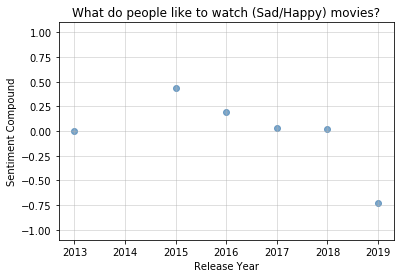

In [35]:
plt.scatter(df_grouped["Year"], df_grouped["sentiment comp"], color="steelblue", alpha=0.7,marker="o")
plt.grid(True, alpha=0.5)
plt.title("What do people like to watch (Sad/Happy) movies?")
plt.xlabel("Release Year")
plt.ylabel("Sentiment Compound")
plt.ylim(-1.1,1.1)
#plt.xlim("201709", "201809")